In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


In [14]:
inflows = pd.read_parquet("../data/ucsd-inflows.pqt")
outflows = pd.read_parquet("../data/ucsd-outflows.pqt")

In [15]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [16]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [37]:
# start with outflows

for column in outflows.columns:
    current_column = outflows[column]
    nulls, unique_values = np.sum(current_column.isnull()), len(current_column.unique())
    column_description = current_column.describe()
    print(f"Column: {column}: \nDtypes of {column_description.dtype}")
    print(f"Null Values: {nulls}")
    print(f"Shape: {column_description['count']}")
    print(f"Unique Values: {unique_values}\n")


Column: prism_consumer_id: 
Dtypes of float64
Null Values: 0
Shape: 2597488.0
Unique Values: 2968

Column: prism_account_id: 
Dtypes of object
Null Values: 0
Shape: 2597488
Unique Values: 4622

Column: memo: 
Dtypes of object
Null Values: 0
Shape: 2597488
Unique Values: 528786

Column: amount: 
Dtypes of float64
Null Values: 0
Shape: 2597488.0
Unique Values: 72262

Column: posted_date: 
Dtypes of object
Null Values: 0
Shape: 2597488
Unique Values: 1952

Column: category: 
Dtypes of object
Null Values: 0
Shape: 2597488
Unique Values: 29



In [38]:
outflows.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


### Qualitative vs Quantitative Categories

'prism_consumer_id' seems to be a categorical variable, as there are unique values that correlate to specific customers

'prism_account_id' similarly seems to be categorical

'memo' is also categorical, repreenting the transaction type (or what the transaction was from)

'amount' is quantitative, representing the amount spent in a transaction

'posted_date' is a time series, meaning it is a continuous quantitative variable (note: might need to change the structure of the date to be recognized as a time variable, because it is currently an 'object' type in the data)

'category' is a categorical variable

In [53]:
payments = outflows["amount"]
payments.describe()

# NOTE: the max in payments is $654853. Let's get rid of this outlier so we can have a better grasp on the normal amounts people spend
# One arbritary amount is 95%, so let's get rid of 5% of the data to illustrate the type of payments that most people make
threshold = np.percentile(payments, 95)
everyday_payments = payments[payments <= threshold]

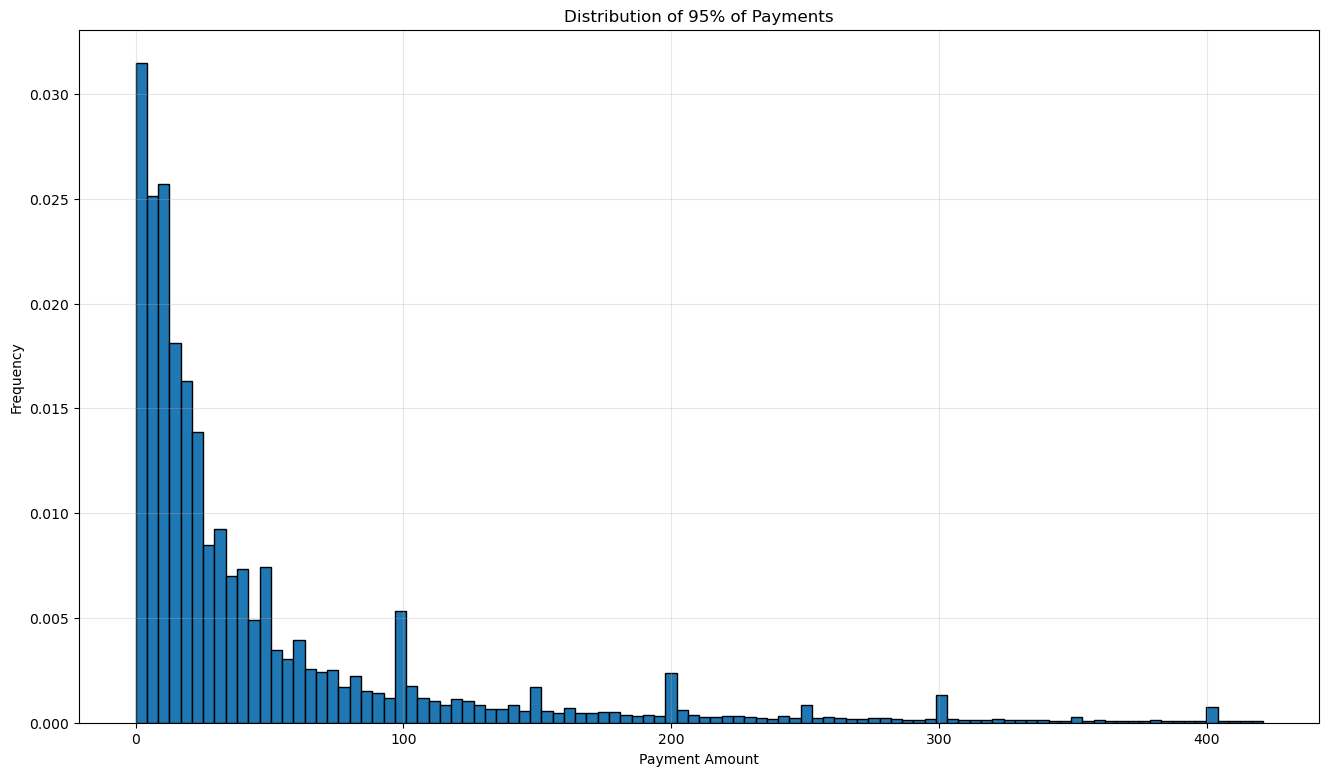

In [79]:
# NOTE: the max in payments is $654853. Let's get rid of this outlier so we can have a better grasp on the normal amounts people spend
#
# histograms of the quantitative data

plt.figure(figsize=(16, 9))
plt.hist(everyday_payments, bins=100, edgecolor="black", density=True)

plt.xlabel("Payment Amount")
plt.ylabel("Frequency")
plt.title("Distribution of 95% of Payments")

plt.grid(True, alpha=0.3)
plt.show()

It looks likes most transactions are in the range between $0 and $100. There is also a pattern of payments being at "good", or even numbers like $50, $100, $150, $200, $250, $300, $350, and $400

In [84]:
# First, let's check if the data is all formmated correctly into dates
dates = outflows["posted_date"]
filtered_dates = dates[dates.apply(lambda x: isinstance(x, date))]

print(
    f"Are any of the dates formatted incorrectly?: {dates.shape[0] != filtered_dates.shape[0]}"
)

Are any of the dates formatted incorrectly?: False


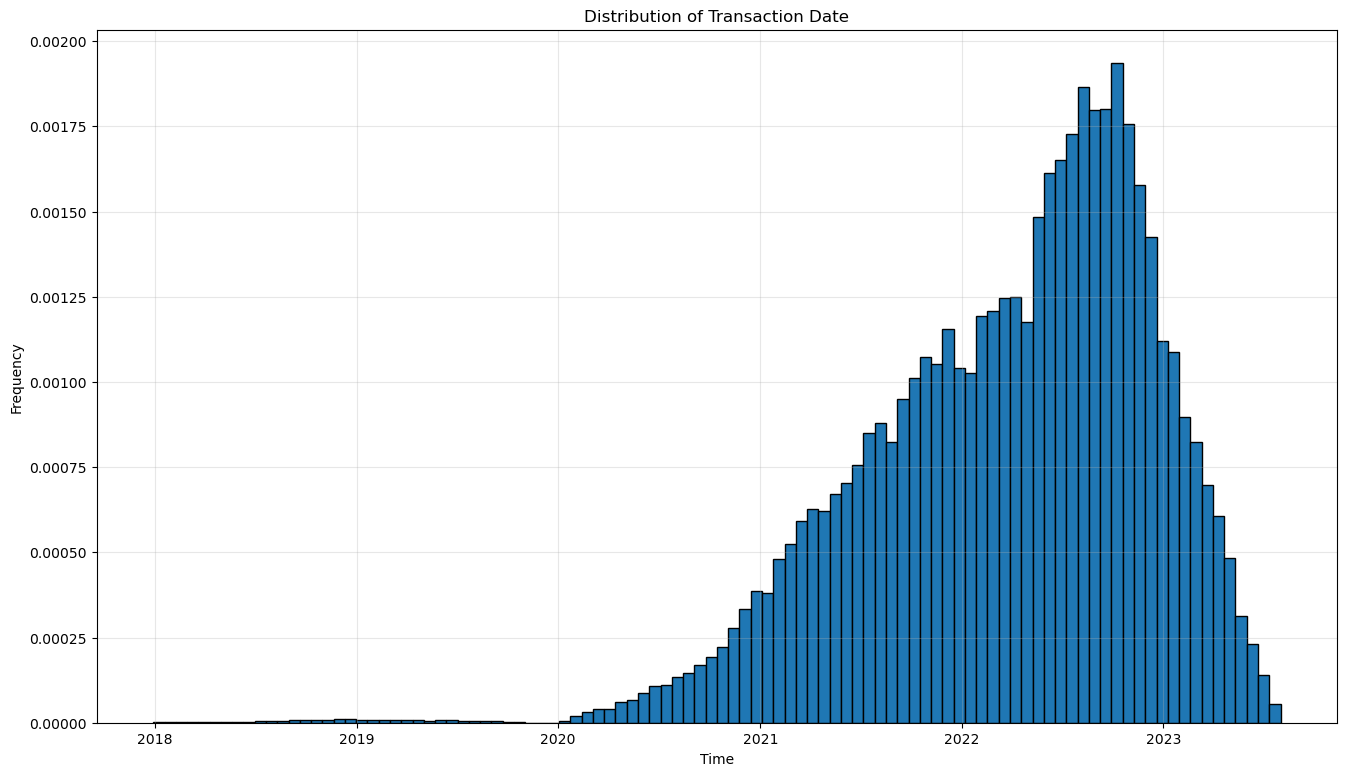

In [78]:
# Therefore, we can progress with time-series data

plt.figure(figsize=(16, 9))
plt.hist(filtered_dates, bins=100, edgecolor="black", density=True)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Date")

plt.grid(True, alpha=0.3)
plt.show()

It seems like most of the transactions in our dataset are from 2020 - 2024. Let's analyze a portion of this dataset to see what times throughout the year are most typically for people to have a transaction in!

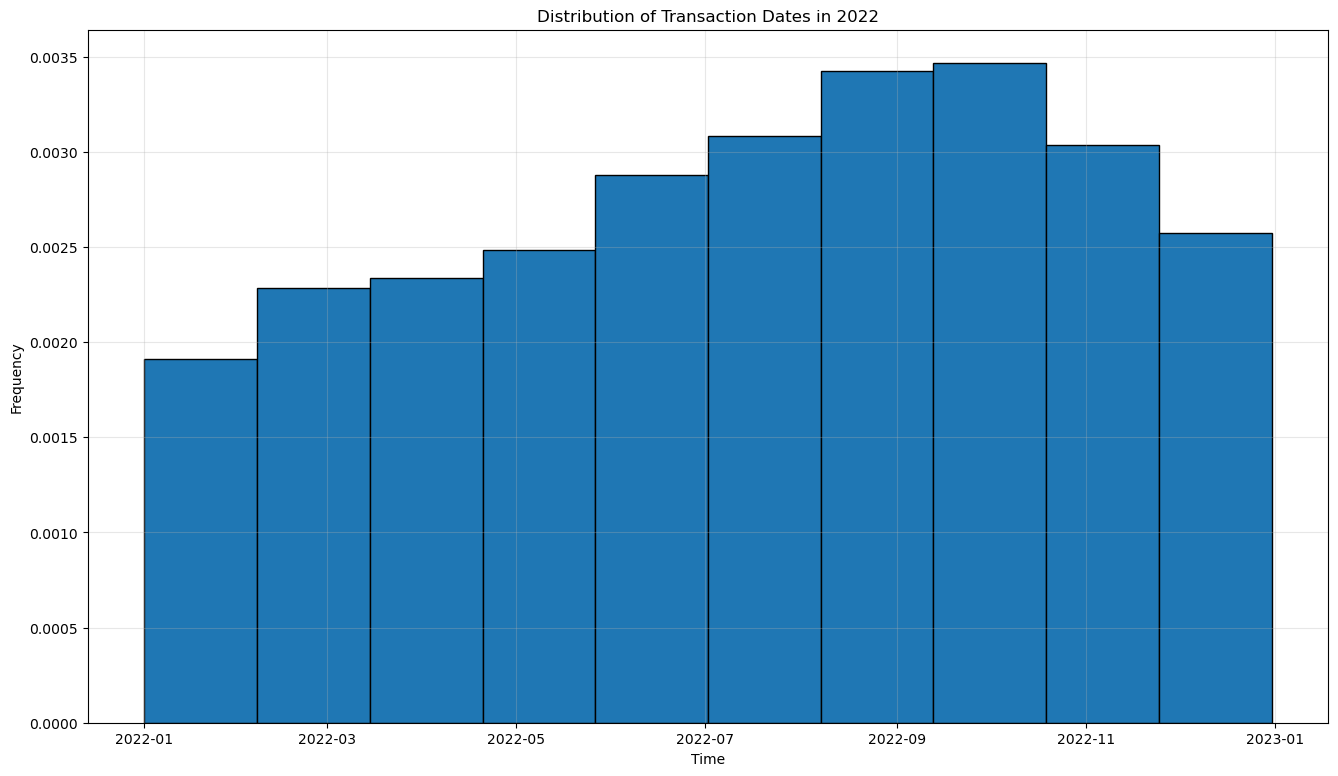

In [85]:
# If we want to get more specific about this, let's look at the year with the most transactions: 2022!
from datetime import date

dates_in_2022 = filtered_dates[
    (filtered_dates > date(2021, 12, 31)) & (filtered_dates < date(2023, 1, 1))
]
plt.figure(figsize=(16, 9))
plt.hist(dates_in_2022, bins=10, edgecolor="black", density=True)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Dates in 2022")

plt.grid(True, alpha=0.3)
plt.show()

It looks like at the beginning of the year is when transactions are done the least (at least in this dataset), while transactions ramp up in the summer months into the start of autumn, only stopping when it reaches November and December.

<Axes: xlabel='posted_date', ylabel='count'>

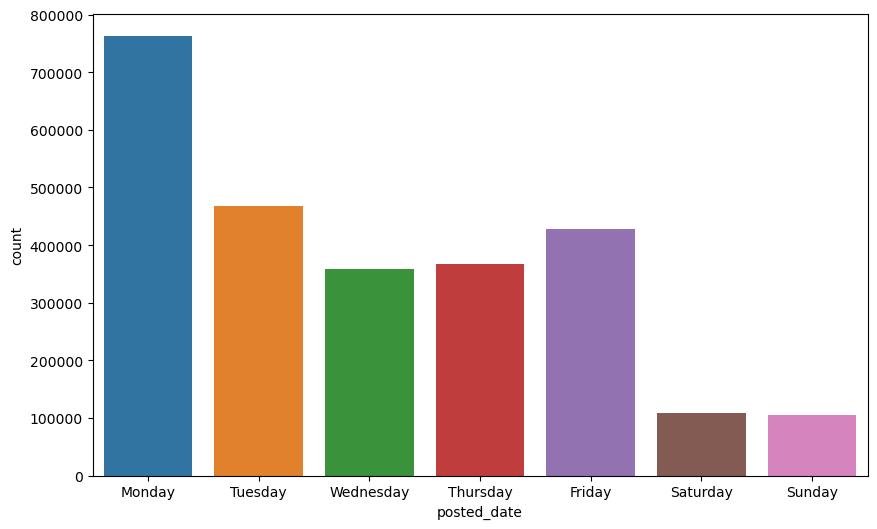

In [125]:
# let's look at what days of the week people are having the most transactions on
filtered_dates = pd.to_datetime(filtered_dates)
day_of_week = filtered_dates.dt.day_name()
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))
counts = day_of_week.value_counts().reindex(days_order)

sns.barplot(x=counts.index, y=counts)


Most transactions seem to occur on the weekdays, while weekends are much sparser

<Axes: xlabel='month', ylabel='amount'>

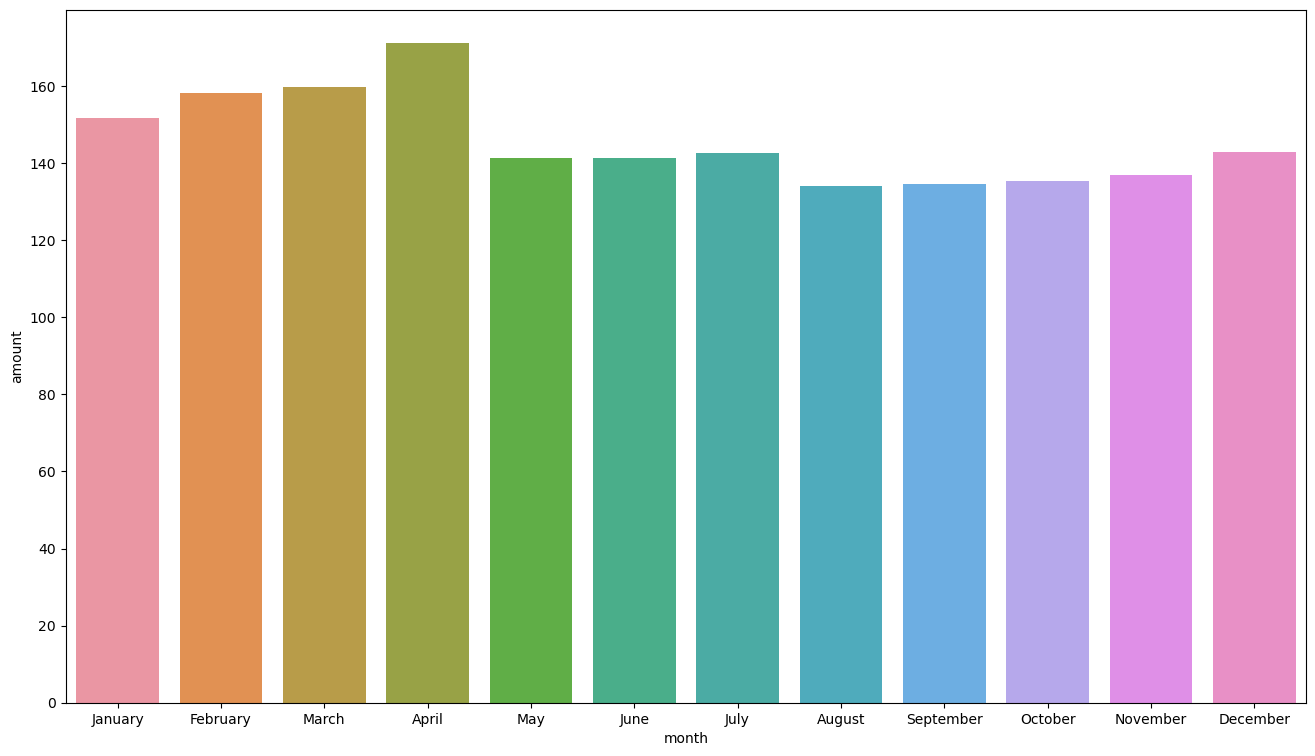

In [124]:
# Now, let's analyze the relationship between numerical data (i.e. the time and the transaction amount)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

numerical_categories = outflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = pd.to_datetime(
    numerical_categories["posted_date"]
)
numerical_categories["month"] = numerical_categories["posted_date"].dt.month_name()
monthly_average = numerical_categories.groupby("month")["amount"].mean().reindex(months)

plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_average.index, y=monthly_average)

Spending during months is typically pretty even, with the average month ranging from around $130 up to $170. Now, let's check how it is regarding total spending

<Axes: xlabel='month', ylabel='amount'>

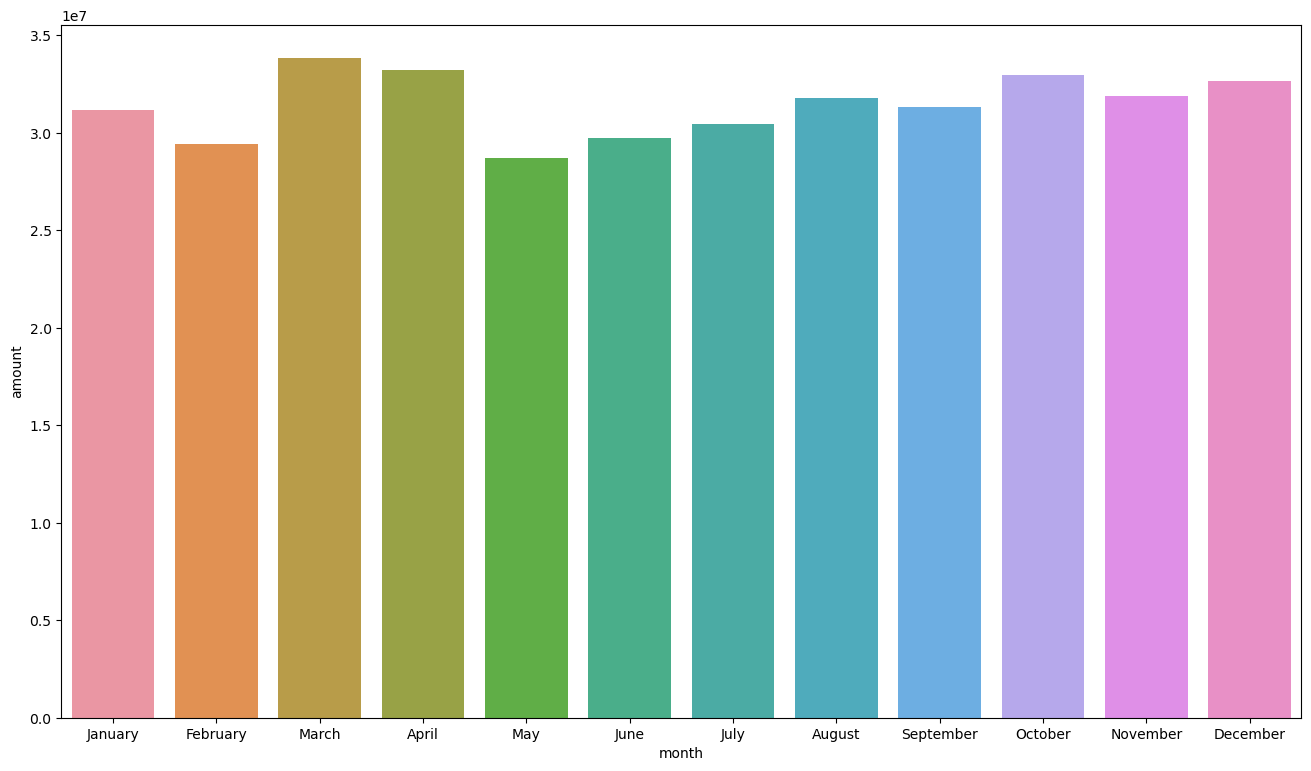

In [127]:
# Now, let's analyze the relationship between numerical data (i.e. the time and the transaction amount)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

numerical_categories = outflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = pd.to_datetime(
    numerical_categories["posted_date"]
)
numerical_categories["month"] = numerical_categories["posted_date"].dt.month_name()
monthly_average = numerical_categories.groupby("month")["amount"].sum().reindex(months)

plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_average.index, y=monthly_average)


In terms of the total amount spent, most months are relatively equal, but some months that lag behind in spending include May, February, and June.

In [128]:
outflows.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


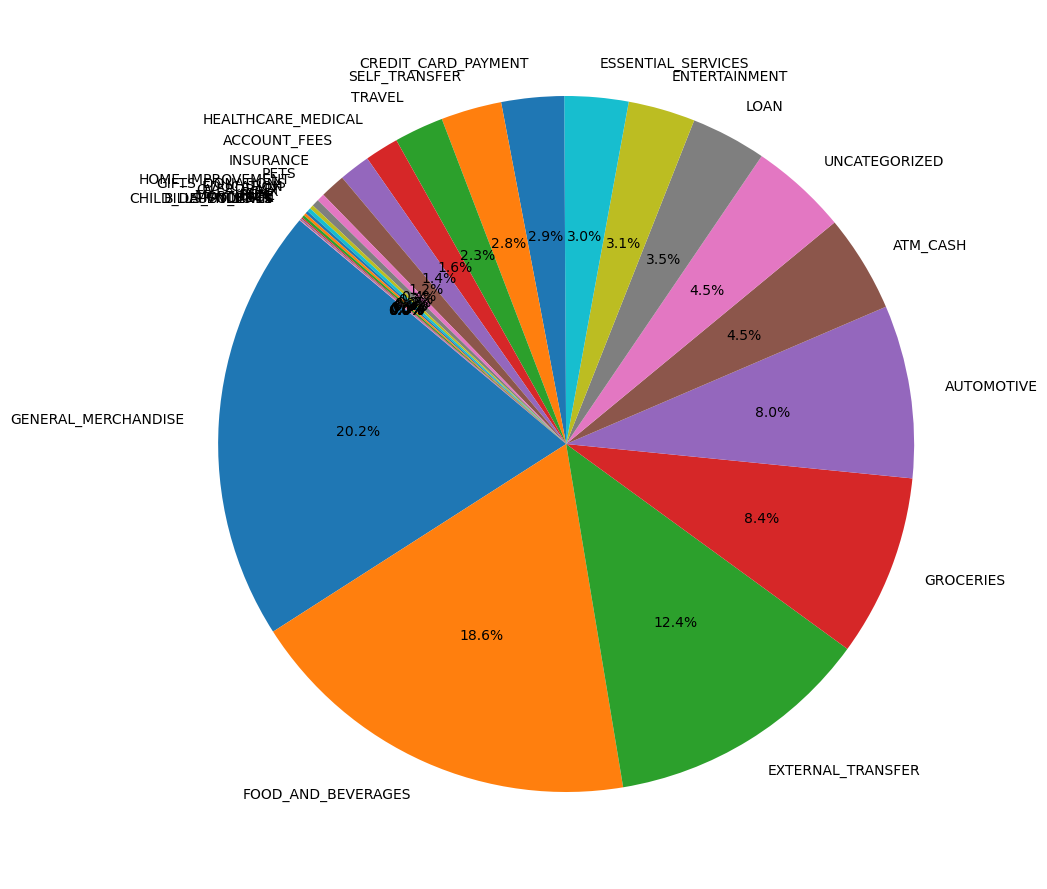

In [135]:
# let's create a pie chart looking at the categories, and which are most common and which are least

categories = outflows['category'].value_counts()
plt.figure(figsize=(16, 9))
_ = plt.pie(categories, labels = categories.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

The most common categories for transactions are general merchanise, food and beverages, external transfers, and groceries

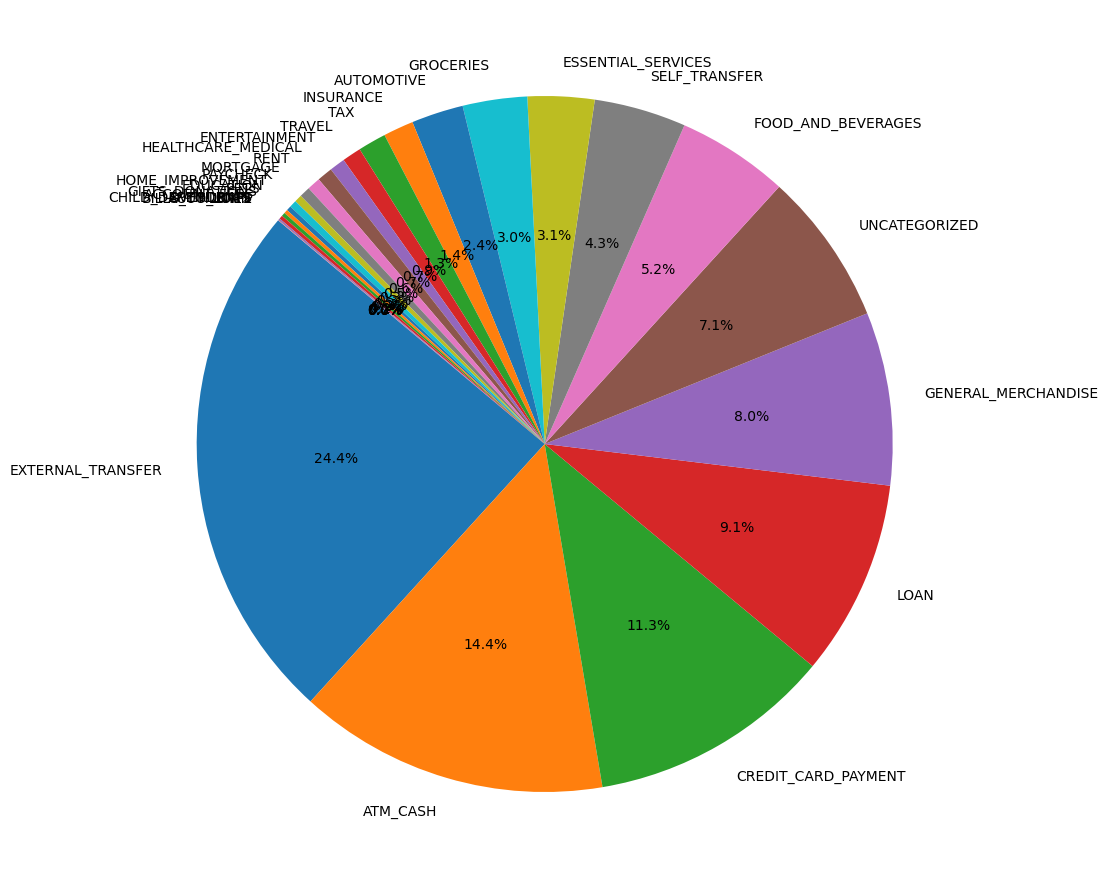

In [138]:
# Let's check how this looks in terms of total cost of spending, instead of just the number of transactions

category_cost = outflows.groupby('category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 9))
_ = plt.pie(category_cost, labels = category_cost.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

When we look at it like this, the most money goes into external transfers, ATMs, credit card payments, and loans

Week #2 Task: Train, Test, Split

In [3]:
from sklearn.model_selection import train_test_split